<a href="https://colab.research.google.com/github/Divyasri-1323/NLP-LAB/blob/main/Assignment_29_8_25_1323.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   id keyword        location  \
0   0  ablaze             NaN   
1   1  ablaze             NaN   
2   2  ablaze   New York City   
3   3  ablaze  Morgantown, WV   
4   4  ablaze             NaN   

                                                text  target  
0  Communal violence in Bhainsa, Telangana. "Ston...       1  
1  Telangana: Section 144 has been imposed in Bha...       1  
2  Arsonist sets cars ablaze at dealership https:...       1  
3  Arsonist sets cars ablaze at dealership https:...       1  
4  "Lord Jesus, your love brings freedom and pard...       0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11370 entries, 0 to 11369
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        11370 non-null  int64 
 1   keyword   11370 non-null  object
 2   location  7952 non-null   object
 3   text      11370 non-null  object
 4   target    11370 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 444.3+ 

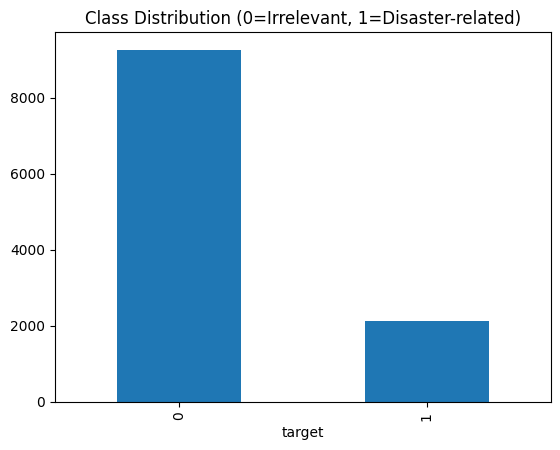


Sample Disaster Tweets:
['#StormBrendan Update-8.00 Tuesday.: Significant overtopping around high tide on Monday evening led to closure of Prom. Wa…', "British politicians are quick to call Israel an 'ally'. Yet when Britain was at war with Argentina, Israel was busy selli…", '1033) British Model Madalyn Davis dies in Sydney cliff fall. https://t.co/EZaWxVWY4y']

Sample Irrelevant Tweets:
['s 1656ABAF :Battle ID I need backup! Lvl 100 Colossus Omega https://t.co/YeOnr59F9Z', 'The place where these children once called home is no more after being bombed by #Assad and #Putin. We are so lucky they are…', 'i ordered one from @/wonu_hurricane ! good luck sis ~ https://t.co/Bm5CmpFREq']


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("tweets.csv")
print(df.head())
print(df.info())

df["target"].value_counts().plot(kind="bar")
plt.title("Class Distribution (0=Irrelevant, 1=Disaster-related)")
plt.show()

print("\nSample Disaster Tweets:")
print(df[df["target"]==1]["text"].sample(3, random_state=42).tolist())

print("\nSample Irrelevant Tweets:")
print(df[df["target"]==0]["text"].sample(3, random_state=42).tolist())


In [4]:
import re, string
import nltk
nltk.download("punkt")
nltk.download("stopwords")
nltk.download("punkt_tab") # Added this line to download the missing resource
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

STOPWORDS = set(stopwords.words("english"))
URL_RE = re.compile(r"http\S+|www\.\S+")
MENTION_RE = re.compile(r"@\w+")
HASHTAG_RE = re.compile(r"#(\w+)")
EMOJI_RE = re.compile("["
                      u"\U0001F600-\U0001F64F"
                      u"\U0001F300-\U0001F5FF"
                      u"\U0001F680-\U0001F6FF"
                      u"\U0001F1E0-\U0001F1FF"
                      "]+", flags=re.UNICODE)

def reduce_elongation(word, max_repeat=2):
    return re.sub(r"(.)\1{%d,}" % max_repeat, r"\1"*max_repeat, word)

def preprocess_text(text):
    text = URL_RE.sub(" ", str(text))
    text = MENTION_RE.sub(" ", text)
    text = HASHTAG_RE.sub(r"\1", text)
    text = EMOJI_RE.sub(" ", text)
    text = text.lower()
    tokens = word_tokenize(text)
    clean = []
    for w in tokens:
        w = w.translate(str.maketrans("", "", string.punctuation))
        if not w or w in STOPWORDS:
            continue
        w = reduce_elongation(w)
        clean.append(w)
    return clean

df["tokens"] = df["text"].apply(preprocess_text)
df["clean_text"] = df["tokens"].apply(lambda x: " ".join(x))
print(df[["text","clean_text"]].head())

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


                                                text  \
0  Communal violence in Bhainsa, Telangana. "Ston...   
1  Telangana: Section 144 has been imposed in Bha...   
2  Arsonist sets cars ablaze at dealership https:...   
3  Arsonist sets cars ablaze at dealership https:...   
4  "Lord Jesus, your love brings freedom and pard...   

                                          clean_text  
0  communal violence bhainsa telangana stones pel...  
1  telangana section 144 imposed bhainsa january ...  
2               arsonist sets cars ablaze dealership  
3               arsonist sets cars ablaze dealership  
4  lord jesus love brings freedom pardon fill hol...  


In [5]:
from nltk.stem import PorterStemmer, WordNetLemmatizer
nltk.download("wordnet")

ps = PorterStemmer()
wnl = WordNetLemmatizer()

sample = df.sample(5, random_state=1)
for _, row in sample.iterrows():
    original = row["text"]
    stemmed = " ".join(ps.stem(w) for w in row["tokens"])
    lemmatized = " ".join(wnl.lemmatize(w) for w in row["tokens"])
    print("\nOriginal :", original)
    print("Stemmed  :", stemmed)
    print("Lemma    :", lemmatized)

[nltk_data] Downloading package wordnet to /root/nltk_data...



Original : 2 seconds. Why is she singing through her nose? And why did she not trim nose hair first. You can hear… https://t.co/AdZYecr7tZ
Stemmed  : 2 second sing nose trim nose hair first hear…
Lemma    : 2 second singing nose trim nose hair first hear…

Original : Water being trucked in , watching 7, 30 this is looking like the biggest ongoing catastrop… https://t.co/FIWDjNpYXJ
Stemmed  : water truck watch 7 30 look like biggest ongo catastrop…
Lemma    : water trucked watching 7 30 looking like biggest ongoing catastrop…

Original : i want some fire ass head.😭
Stemmed  : want fire ass head
Lemma    : want fire as head

Original : Joined Premier &amp; Comm Baxter today to visit the Ulladulla Disaster Welfare Assistance Welfare Point. A focus…
Stemmed  : join premier amp comm baxter today visit ulladulla disast welfar assist welfar point focus…
Lemma    : joined premier amp comm baxter today visit ulladulla disaster welfare assistance welfare point focus…

Original : UAE bracing up 

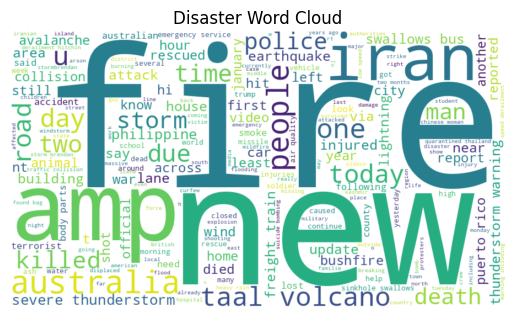

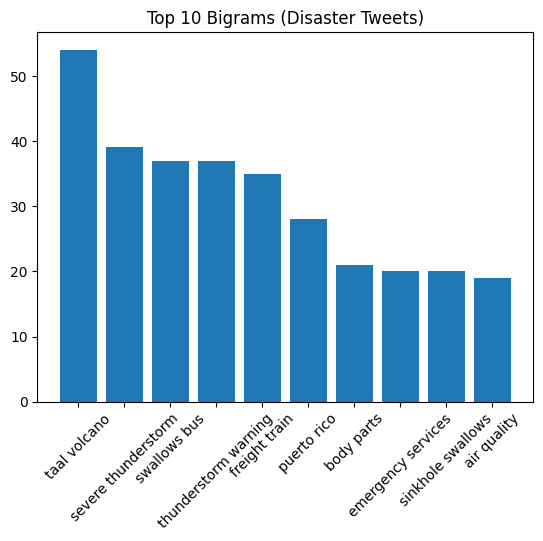

In [6]:
from wordcloud import WordCloud
from collections import Counter
from itertools import tee

# Word Cloud
disaster_tokens = [w for toks in df[df["target"]==1]["tokens"] for w in toks]
wc = WordCloud(width=900, height=500, background_color="white").generate(" ".join(disaster_tokens))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("Disaster Word Cloud")
plt.show()

# Top 10 bigrams
def bigrams(tokens):
    a, b = tee(tokens)
    next(b, None)
    return zip(a, b)

bigram_counter = Counter()
for toks in df[df["target"]==1]["tokens"]:
    bigram_counter.update([" ".join(bg) for bg in bigrams(toks)])

labels, vals = zip(*bigram_counter.most_common(10))
plt.bar(range(len(labels)), vals)
plt.xticks(range(len(labels)), labels, rotation=45)
plt.title("Top 10 Bigrams (Disaster Tweets)")
plt.show()


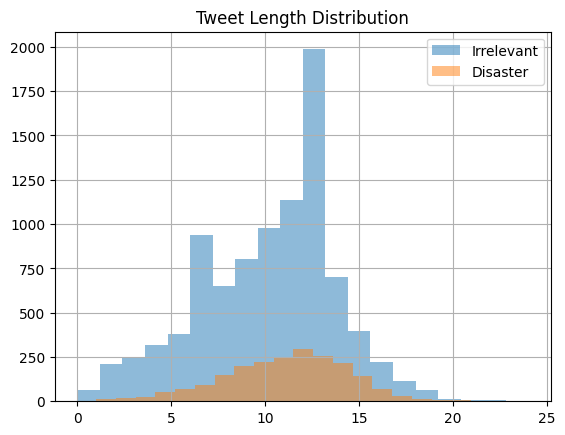

Avg length Irrelevant: 10.071089023336214
Avg length Disaster  : 11.12961210974456


In [7]:
df["len_tokens"] = df["tokens"].apply(len)

df[df["target"]==0]["len_tokens"].hist(alpha=0.5, bins=20, label="Irrelevant")
df[df["target"]==1]["len_tokens"].hist(alpha=0.5, bins=20, label="Disaster")
plt.legend()
plt.title("Tweet Length Distribution")
plt.show()

print("Avg length Irrelevant:", df[df["target"]==0]["len_tokens"].mean())
print("Avg length Disaster  :", df[df["target"]==1]["len_tokens"].mean())


In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

X = df["clean_text"]
y = df["target"]

vectorizer = TfidfVectorizer(max_features=7000, ngram_range=(1,2))
X_vec = vectorizer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_vec, y, test_size=0.2, random_state=42, stratify=y
)

print("Train size:", X_train.shape)
print("Test size :", X_test.shape)


Train size: (9096, 7000)
Test size : (2274, 7000)


In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

models = {
    "LogisticRegression": LogisticRegression(max_iter=1000),
    "NaiveBayes": MultinomialNB()
}

fitted_models = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    fitted_models[name] = model
    print(f"{name} trained.")


LogisticRegression trained.
NaiveBayes trained.



LogisticRegression Results
              precision    recall  f1-score   support

           0       0.86      0.99      0.92      1851
           1       0.87      0.31      0.46       423

    accuracy                           0.86      2274
   macro avg       0.87      0.65      0.69      2274
weighted avg       0.86      0.86      0.84      2274



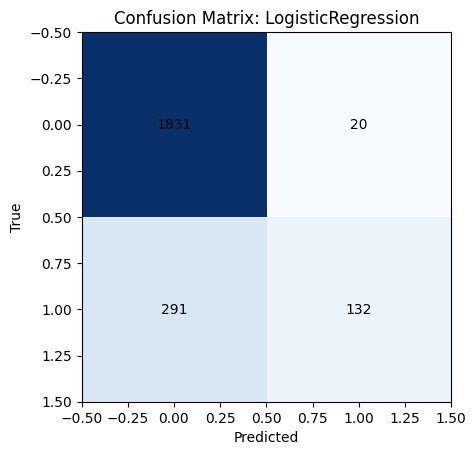


NaiveBayes Results
              precision    recall  f1-score   support

           0       0.88      0.98      0.93      1851
           1       0.85      0.41      0.55       423

    accuracy                           0.88      2274
   macro avg       0.86      0.69      0.74      2274
weighted avg       0.87      0.88      0.86      2274



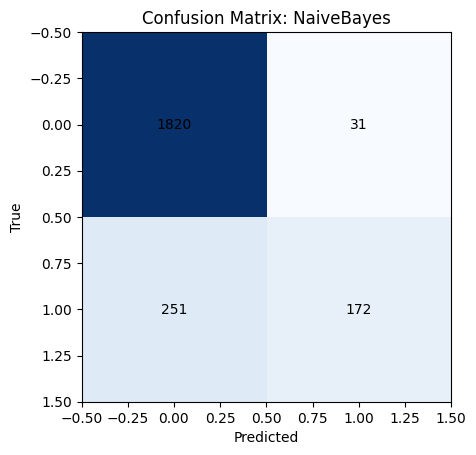

In [10]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np

for name, model in fitted_models.items():
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"\n{name} Results")
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    plt.imshow(cm, cmap="Blues")
    plt.title(f"Confusion Matrix: {name}")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    for (i,j), v in np.ndenumerate(cm):
        plt.text(j,i,str(v),ha="center",va="center")
    plt.show()
